In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
DIR = "./output/11"
fileName = "sp500_3dim_10k-Training_summary-13FEB.out"
path = os.path.join(DIR, fileName)
result = pickle.load(open(path, "rb"))
len(result)

10

In [5]:
def drawHist(result, col, name, xlabel, ylabel):
    data_list = [tmp[col] for tmp in result]
    result_df = pd.DataFrame(result)
    data_series = pd.Series(data_list, name=name)
    # Plotting hist without kde
    ax = sns.distplot(data_series, kde=False, bins=20)
    # Creating another Y axis
    second_ax = ax.twinx()
    #Plotting kde without hist on the second Y axis
    sns.distplot(data_series, ax=second_ax, kde=True, hist=False, bins=20)
    #Removing Y ticks from the second axis
    second_ax.set_yticks([])
    ax.set(xlabel = xlabel, ylabel = ylabel, title = name)
    return ax

In [6]:
def drawScatter(result, col, name, xlabel, ylabel):
    result_df = pd.DataFrame(result)
    plt.scatter(result_df['total_shares_sold'], result_df[col])
    plt.title(name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return plt

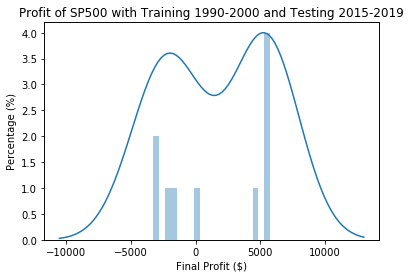

In [7]:
name = "Profit of SP500 with Training 1990-2000 and Testing 2015-2019"
xlabel = "Final Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "final", name, xlabel, ylabel)

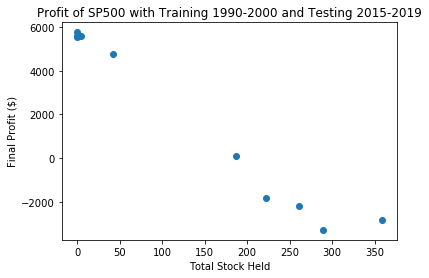

<module 'matplotlib.pyplot' from 'C:\\Users\\lzcai\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
drawScatter(result, "final", name, "Total Stock Held", xlabel)

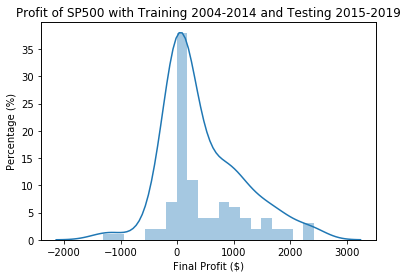

In [31]:
name = "Profit of SP500 with Training 2004-2014 and Testing 2015-2019"
xlabel = "Final Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "final", name, xlabel, ylabel)

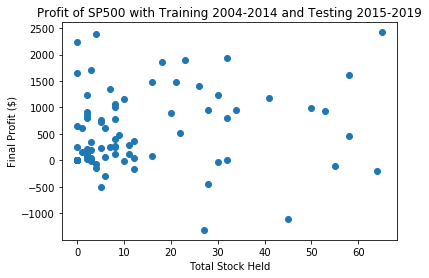

In [32]:
drawScatter(result, "final", name, "Total Stock Held", xlabel)

In [33]:
path = "./output/7/sp500_actual_04FEB2020.out"
result = pickle.load(open(path, "rb"))
len(result)

100

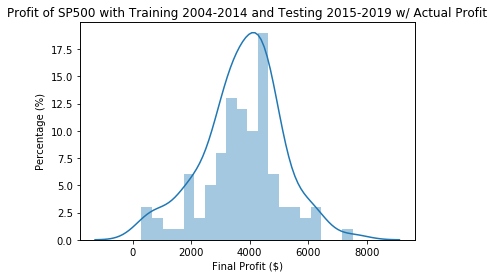

In [34]:
name = "Profit of SP500 with Training 2004-2014 and Testing 2015-2019 w/ Actual Profit"
xlabel = "Final Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "final", name, xlabel, ylabel)

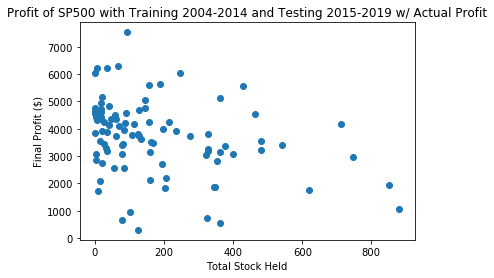

In [35]:
drawScatter(result, "final", name, "Total Stock Held", xlabel)

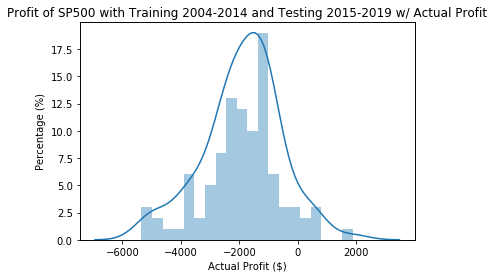

In [36]:
name = "Profit of SP500 with Training 2004-2014 and Testing 2015-2019 w/ Actual Profit"
xlabel = "Actual Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "act_final", name, xlabel, ylabel)

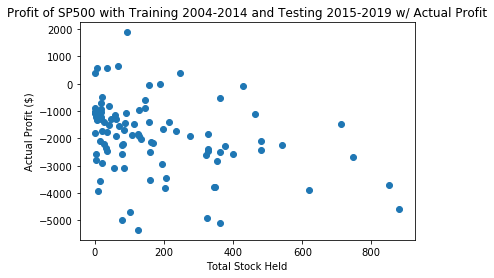

In [37]:
drawScatter(result, "act_final", name, "Total Stock Held", xlabel)

In [92]:
path = "./output/8/sp500_actual_04FEB2020.out"
result = pickle.load(open(path, "rb"))
len(result)

100

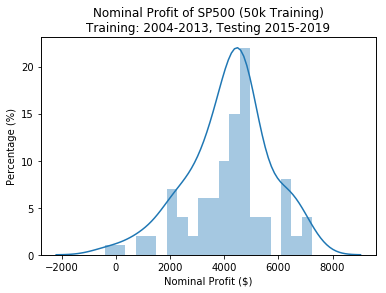

In [93]:
name = "Nominal Profit of SP500 (50k Training)\nTraining: 2004-2013, Testing 2015-2019"
xlabel = "Nominal Profit ($)"
ylabel = "Percentage (%)"
ax = drawHist(result, "final", name, xlabel, ylabel)

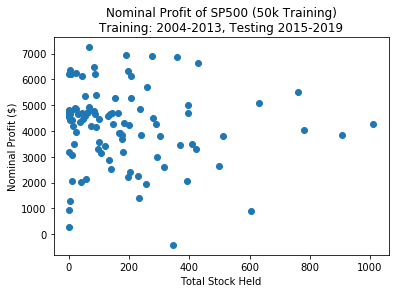

<module 'matplotlib.pyplot' from 'C:\\Users\\lzcai\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [94]:
drawScatter(result, "final", name, "Total Stock Held", xlabel)

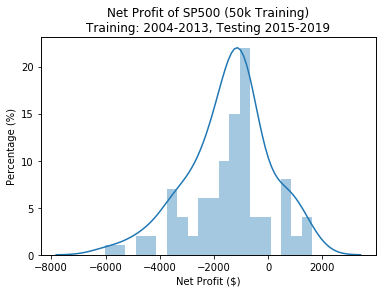

In [95]:
name = "Net Profit of SP500 (50k Training)\nTraining: 2004-2013, Testing 2015-2019"
xlabel = "Net Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "act_final", name, xlabel, ylabel)

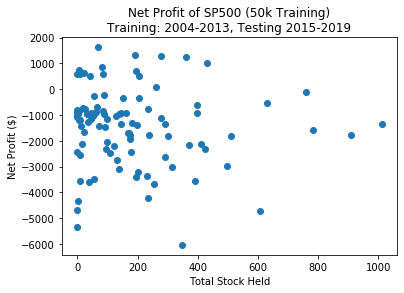

<module 'matplotlib.pyplot' from 'C:\\Users\\lzcai\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [96]:
drawScatter(result, "act_final", name, "Total Stock Held", xlabel)

In [97]:
path = "./output/9/sp500_actual_10k Training_04FEB2020.out"
result = pickle.load(open(path, "rb"))
len(result)

100

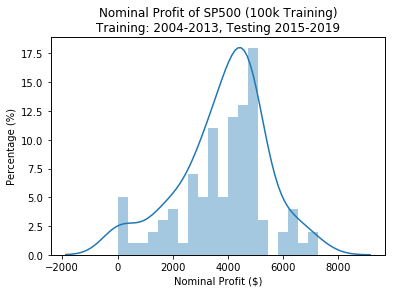

In [98]:
name = "Nominal Profit of SP500 (100k Training)\nTraining: 2004-2013, Testing 2015-2019"
xlabel = "Nominal Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "final", name, xlabel, ylabel)

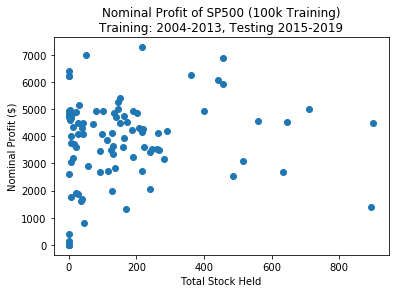

<module 'matplotlib.pyplot' from 'C:\\Users\\lzcai\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [99]:
drawScatter(result, "final", name, "Total Stock Held", xlabel)

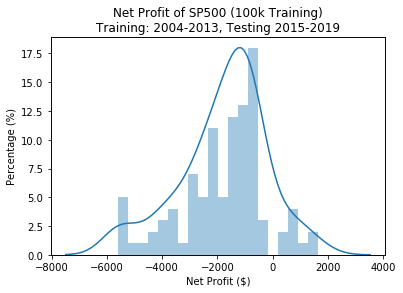

In [100]:
name = "Net Profit of SP500 (100k Training)\nTraining: 2004-2013, Testing 2015-2019"
xlabel = "Net Profit ($)"
ylabel = "Percentage (%)"
drawHist(result, "act_final", name, xlabel, ylabel)

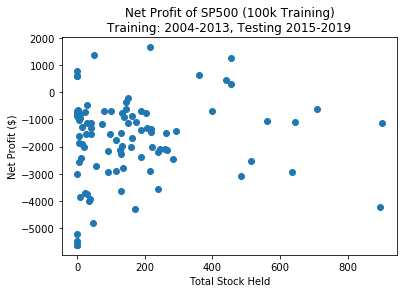

<module 'matplotlib.pyplot' from 'C:\\Users\\lzcai\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [101]:
drawScatter(result, "act_final", name, "Total Stock Held", xlabel)

In [46]:
result[1]['final']-result[1]['act_final']

5621.103349655241

In [5]:
avg_list = [tmp['mean'] for tmp in result]
len(avg_list)

100

In [53]:
pickle.dump(result, open("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020_ALL.out", "wb"))

In [9]:
result_df = pd.DataFrame(result)
# result_df.to_csv("./output/4/sp500_train100000_test2000_repeat100_withsold_21JAN2020_ALL.csv")

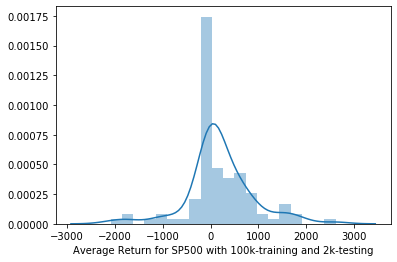

In [6]:
avg_series = pd.Series(avg_list, name="Average Return for SP500 with 100k-training and 2k-testing")
sns.distplot(avg_series, bins=20);

[]

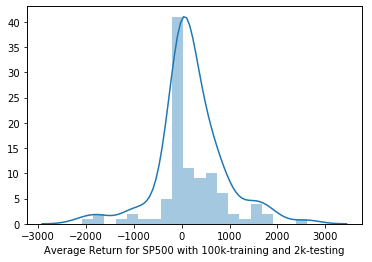

In [7]:
# Plotting hist without kde
ax = sns.distplot(avg_series, kde=False, bins=20)

# Creating another Y axis
second_ax = ax.twinx()

#Plotting kde without hist on the second Y axis
sns.distplot(avg_series, ax=second_ax, kde=True, hist=False, bins=20)

#Removing Y ticks from the second axis
second_ax.set_yticks([])

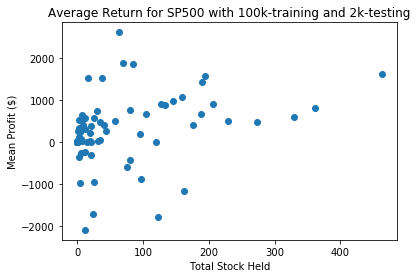

In [10]:
plt.scatter(result_df['total_shares_sold'], result_df['mean'])
plt.title("Average Return for SP500 with 100k-training and 2k-testing")
plt.xlabel("Total Stock Held")
plt.ylabel("Mean Profit ($)")
plt.show()